L'objectif de mon projet est d'implémenté un réseau de neurones avec NumPy qui égale les performances des librairies standards sur des données de diagnostic du cancer : mon but est d'avoir un score proche de celui du package Scikit-Learn (environ 95-97%)

In [ ]:
#pour commencer je crée des fonctions de base pour un réseau de neurones en Python. Ceux-ci vont m'aider pour la suite

import numpy as np

# --- 1. FONCTION D'ACTIVATION ---
def sigmoid(z):
    """Calcule la sigmoïde"""
    return 1 / (1 + np.exp(-z))

# --- 2. INITIALISATION ---
def initialize_parameters(n_x, n_h, n_y):
    """Crée les poids (W) et biais (b) initiaux"""
    np.random.seed(2) # Pour avoir des résultats reproductibles
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

# --- 3. PROPAGATION AVANT (FORWARD) ---
def forward_propagation(X, parameters):
    """Le modèle fait sa prédiction"""
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Couche 1 (Cachée)
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    
    # Couche 2 (Sortie)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

# --- 4. CALCUL DU COÛT (COST) ---
def compute_cost(A2, Y):
    """Calcule l'erreur globale (Log Loss)"""
    m = Y.shape[1] # Nombre d'exemples
    
    # Formule de l'entropie croisée
    logprobs = -np.multiply(np.log(A2), Y) - np.multiply(np.log(1 - A2), (1 - Y))
    cost = 1/m * np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # S'assure que c'est un scalaire
    return cost

# --- 5. RÉTROPROPAGATION (BACKWARD) ---
def backward_propagation(parameters, cache, X, Y):
    """Calcule les gradients (qui est responsable de l'erreur ?)"""
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Dérivée Couche 2
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    # Dérivée Couche 1 
    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

# --- 6. MISE À JOUR ---
def update_parameters(parameters, grads, learning_rate=1.2):
    """Met à jour les poids pour apprendre"""
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

# --- 7. MODÈLE GLOBAL ---
def nn_model(X, Y, n_h, num_iterations=10000, learning_rate=1.2, print_cost=False):
    """Assemble tout le puzzle"""
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(0, num_iterations):
        # Forward
        A2, cache = forward_propagation(X, parameters)
        # Cost
        cost = compute_cost(A2, Y)
        # Backward
        grads = backward_propagation(parameters, cache, X, Y)
        # Update
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print ("Coût après itération %i: %f" %(i, cost))
            
    return parameters

# --- 8. PRÉDICTION ---
def predict(X, parameters):
    """Fait des prédictions finales (0 ou 1)"""
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

# --- 9. UTILITAIRE (Taille des couches) ---
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4 # Valeur par défaut, sera écrasée par nn_model
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

ici je vais voir si le fichier que je prend pour tester mon modèle est bien nettoyer:

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# 1.--- CHARGEMENT ET PRÉPARATION DES DONNÉES ---
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target # On ajoute la réponse (0 ou 1)

# 2. Vérification des valeurs manquantes 
print("--- Vérification des valeurs manquantes ---")
print(df.isnull().sum().sum()) 

# 3. Vérification des échelles
print("\n--- Aperçu des statistiques ---")
print(df[['mean radius', 'mean area', 'mean smoothness']].describe())

--- Vérification des valeurs manquantes ---
0

--- Aperçu des statistiques ---
       mean radius    mean area  mean smoothness
count   569.000000   569.000000       569.000000
mean     14.127292   654.889104         0.096360
std       3.524049   351.914129         0.014064
min       6.981000   143.500000         0.052630
25%      11.700000   420.300000         0.086370
50%      13.370000   551.100000         0.095870
75%      15.780000   782.700000         0.105300
max      28.110000  2501.000000         0.163400


In [1]:

import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Charger le dataset médical
data = load_breast_cancer()
X_org = data.data    # Les mesures (Rayon, Texture...)
y_org = data.target  # Le diagnostic (0 = Malin, 1 = Bénin)

print(f"Forme originale des données : {X_org.shape}") 
# (569, 30) -> 569 patients, 30 caractéristiques

# 2. Séparer en Entraînement / Test 
# On garde 20% des patients de côté pour l'examen final
X_train, X_test, y_train, y_test = train_test_split(X_org, y_org, test_size=0.2, random_state=42)

# 3. Normaliser (Mise à l'échelle) - pour de meilleures performances (je veux entre 0-1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. LA TRANSPOSITION 
# mettre en ligne pas en colonne
# ensuite je transpose
X_train_model = X_train_scaled.T
X_test_model = X_test_scaled.T

# On s'assure que Y a la bonne forme (1, m)
y_train_model = y_train.reshape(1, -1)
y_test_model = y_test.reshape(1, -1)

print(f"Forme pour mon modèle manuel : {X_train_model.shape}")

Forme originale des données : (569, 30)
Forme pour mon modèle manuel : (30, 455)


In [ ]:
# --- COMBATTANT 1 : Mon CODE ---
print("--- Entraînement de MON modèle manuel ---")
parameters = nn_model(X_train_model, y_train_model, n_h=5, num_iterations=10000, learning_rate=0.5, print_cost=True)

# Prédiction sur les données de test
y_pred_my_model = predict(X_test_model, parameters)
accuracy_me = accuracy_score(y_test_model[0], y_pred_my_model[0])
print(f"Précision de MON modèle : {accuracy_me * 100:.2f}%")


# --- COMBATTANT 2 : SCIKIT-LEARN 
print("\n--- Entraînement de SCIKIT-LEARN ---")
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
accuracy_sklearn = clf.score(X_test_scaled, y_test)
print(f"Précision de SCIKIT-LEARN : {accuracy_sklearn * 100:.2f}%")

--- Entraînement de MON modèle manuel ---
Coût après itération 0: 0.693778
Coût après itération 1000: 0.045068
Coût après itération 2000: 0.037093
Coût après itération 3000: 0.030692
Coût après itération 4000: 0.027096
Coût après itération 5000: 0.024283
Coût après itération 6000: 0.021923
Coût après itération 7000: 0.019941
Coût après itération 8000: 0.018296
Coût après itération 9000: 0.016880
Précision de MON modèle : 97.37%

--- Entraînement de SCIKIT-LEARN (Logistic Regression) ---
Précision de SCIKIT-LEARN : 97.37%


Les résultats sont concluant comme nous pouvons le voir ici :

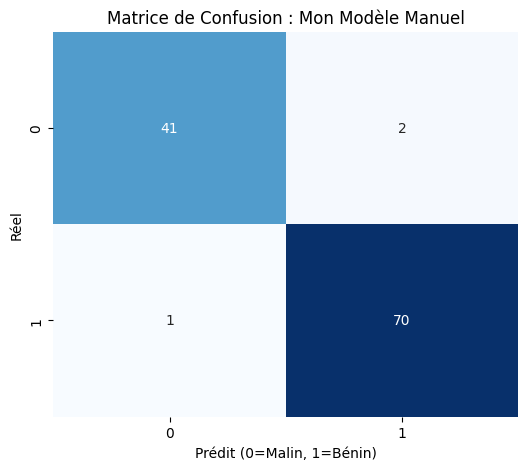

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcul de la matrice
cm = confusion_matrix(y_test, y_pred_my_model[0])

# Affichage avec Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion : Mon Modèle Manuel")
plt.xlabel("Prédit (0=Malin, 1=Bénin)")
plt.ylabel("Réel")
plt.show()

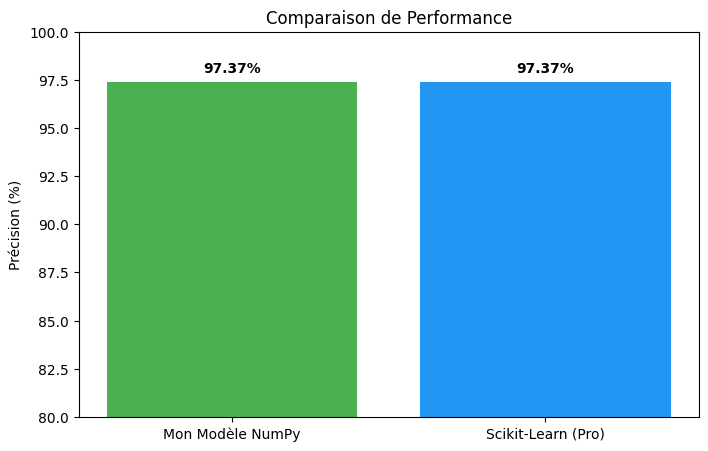

In [ ]:
models = ['Mon Modèle NumPy', 'Scikit-Learn (Pro)']
scores = [accuracy_me * 100, accuracy_sklearn * 100]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores, color=['#4CAF50', '#2196F3']) # Vert pour moi, Bleu pour Sklearn
plt.ylim(80, 100) # je zoom entre 80 et 100% pour voir la différence
plt.ylabel('Précision (%)')
plt.title('Comparaison de Performance')

# Ajouter les chiffres sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.2f}%", ha='center', fontweight='bold')

plt.show()